**Importing Libraries Required**

We have used the OS Library specifically for accessing folders, files stored on the desktop.

The MATPLOTLIB library is used for reading the images (converting it into pixel format).

Pandas library is used for storing the data in a covenient format.

Numpy will be used for some matrix based mathematical operations.

Kmeans is required for forming our model.

Math library is used to perform mathematical operations (square root in our case).

In [3]:
import os
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import math
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

**Forming the Dataset Structure**

To begin with, we form a Dataframe with just the columns and their headers. The columns are supposed to represent the pixel indices. Thus, there are 784 values for the same number of pixels (28 x 28). Each row is going to represent an image.

In [133]:
X = pd.DataFrame(columns = [*range(0,784)])


**Saving the directory paths**

We start with saving the directory path, where the data is stored, in a variable "PATH". We then use the "join" function to 'join' the folder names, where our training and testing images are stored, with our variable PATH. 

In [53]:
PATH = os.path.join("C:\\Users\Rahul Singh\\Downloads","data")
train_dir = os.path.join(PATH,'training-images')
test_dir = os.path.join(PATH,'test-images')

The below function is used to convert an RGB image to a grayscale one. The three channels are multiplied with fixed values (think of it as a ratio) that are used in accordance to the contribution each of the channel have in forming the grayscale image.

In [54]:
def rgb_to_gray (rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

**Flattening the image**

The below lines of code are used to flatten the images into rows of pixel values.



In [135]:
#A list to store lists of flattened image pixels
data = []
og_cluster = []
#Starting a for loop to traverse through the image folders, where the folder name is the label of the corresponding image
for file in os.scandir(train_dir):
#Traversing through all the images in each folder
    for image in os.scandir(file):
        img = mpimg.imread(image.path) #using the imread function to convert an image into its pixel values
        fin_img = rgb_to_gray(img)     #calling the earlier defined function to convert RGB to grayscale
        data.append(fin_img.flatten()) #adding all such lists of pixel values in another list, making a list of lists
        og_cluster.append(file.name)
for file in os.scandir(test_dir):      #the ab
    for image in os.scandir(file):
        img = mpimg.imread(image.path)
        fin_img = rgb_to_gray(img)
        data.append(fin_img.flatten())
        og_cluster.append(file.name)

In [136]:
ddd = np.array(data)  #typecasting the list to numpy array
ddd.shape

(654, 784)

In [137]:
#adding the list of pixel values in a proper Dataframe 
for i in range(ddd.shape[1]): 
    X[i] = ddd[:,i]

**Making the K Means Model**

The K Means function is called andthe above prepared dataframe is fitted, for a range of values of K (the amount of clusters to be formed)

**Calculating the silhouette Score**

The below code is used for calculating the silhoette score

The Silhouette score is calculated for each and every datapoint, and later on averaged.

The silhouette score can be thought of as a measure that indicates the correctness of the clusters formed by comparing the overall distance of the data points to its own cluster and that of the nearest neighbouring cluster. 

In [62]:
sicoeff = []
for k in range(2,16):
    kmeans = KMeans(n_clusters=k, random_state=0).fit_predict(X) #fitting and storing the results in the variable kmeans
    leng = []                              # A list used to store the a(i) values of all the datapoints
    for cno in np.unique(kmeans):          # Traversing through all the clusters formed by the function
        df2 = X.loc[np.where(kmeans==cno)] # Separating each cluster and storing their datapoints in one cluster
        if len(df2)==1:                    # If the cluster consists of a single datapoint, then the value is set to 0
            leng.append(0)
        else:
            for val in df2.values:
                list1 = ([math.sqrt(sum([ (i-j)**2 for i,j in zip(val,x)])) for x in df2.values]) # calculating the euclidean distance of each datapoint to the others, belonging to the same cluster
                leng.append(sum(list1)/(len(list1)-1))  # Storing the average for each cluster
    lengg = []
    fg = np.unique(kmeans)                   # sorting the clusters
    for i in fg:
        dfog = X.iloc[np.where(kmeans==i)]   # storing the clusters' datapoints in dataframe
        neighc = fg[fg!=i]                   # A list of the other clusters (apart from the one whose dataframe has been formed)
        for val in dfog.values:
            hjk = []
            for cluster in neighc:
                df2 = X.iloc[np.where(kmeans==cluster)]   # forming a dataframe of each neighbouring cluster
                list1 = ([math.sqrt(sum([ (i-j)**2 for i,j in zip(val,x)])) for x in df2.values])  #for each value in the original dataframe, we calculate the distance from each datapoint in the neighbouring cluster
                hjk.append(sum(list1)/(len(list1)))       # storing the mean of each cluster in a list
            bi = min(hjk)                                 #separating the minimum (nearest neighbour) value from the rest
            lengg.append(bi)
    siscores = [(bi - ai)/(max(ai,bi)) for ai,bi in zip (leng,lengg)]  # Calulating the distance from the above values
    sicoeff.append(sum(siscores)/len(siscores))                        # Averaging the values

In [138]:
sicoeff

[0.08491386255749697,
 0.030360514672029566,
 0.006845419671071685,
 -0.03037679950883297,
 -0.028002312453992872,
 0.014395771644017211,
 0.013137296078635839,
 0.015505260113668682,
 0.019852597248379306,
 -0.01077840100605825,
 0.00836486050275752,
 0.0036014465620583394,
 0.00783629574866349,
 0.008078223093724567]

In [116]:
model = KMeans()
visualizer = KElbowVisualizer(KMeans(random_state = 0),metric = 'silhouette' ,k=(2,20),locate_elbow=True)

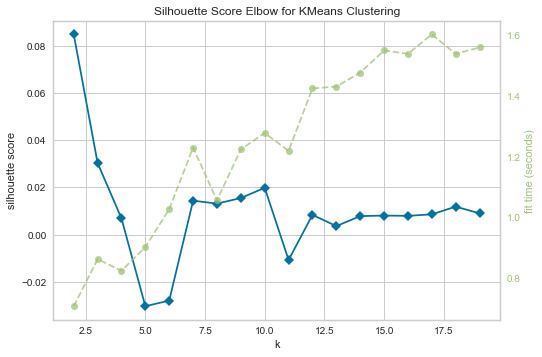

In [117]:
visualizer.fit(X)
visualizer.poof()

**Plotting the sum of distances squared between the datapoints and their cluster center against the number of k**

In [123]:
k_list = list(range(2,16))
dist_list = []
for i in k_list:
    k = i 
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    dist_list.append(kmeans.inertia_)

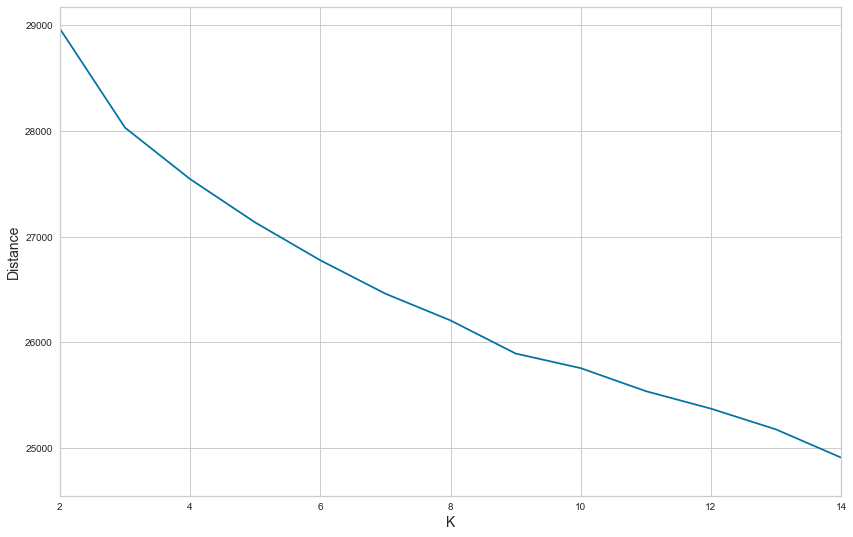

In [124]:
plt.figure(figsize = (14,9))
plt.plot(k_list,dist_list)
plt.xlabel('K',fontsize=14)
plt.ylabel('Distance',fontsize=14)
plt.xscale('linear')
plt.xlim(2,14)
plt.show()

**From the above results, it is evident that k=2 should be selected. The following code is used to see how many of the original classes fall under the formed clusters**

In [131]:
for i in np.unique(kmeans2):
    for j in clus[kmeans2==i]:
        mat.loc[i,j]+=1
mat

,0,1,2,3
0,60.0,150.0,153.0,150.0
1,140.0,0.0,1.0,0.0


**Showing images**

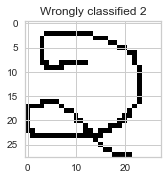

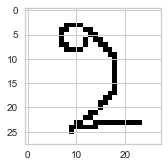

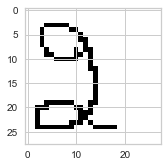

In [183]:
plt.subplot(2,2,1)
plt.imshow(X.loc[602].to_numpy().reshape((28,28)),cmap = 'gray')
plt.title('Wrongly classified 2')
plt.show()

plt.subplot(2,2,1)
plt.imshow(X.loc[603].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()

plt.subplot(2,2,1)
plt.imshow(X.loc[600].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()


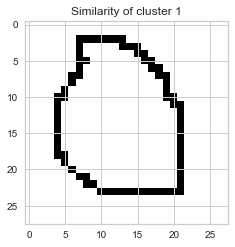

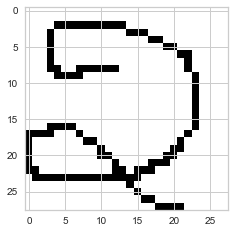

In [207]:
plt.subplot(1,2,1)
plt.imshow(X.loc[13].to_numpy().reshape((28,28)),cmap = 'gray')
plt.title('Similarity of cluster 1')
plt.show()

plt.subplot(1,2,2)
plt.imshow(X.loc[602].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()

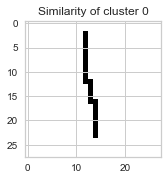

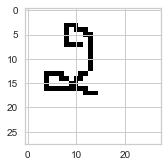

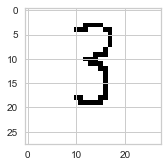

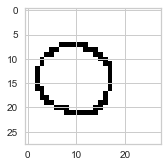

In [194]:
plt.subplot(2,2,1)
plt.imshow(X.loc[150].to_numpy().reshape((28,28)),cmap = 'gray')
plt.title('Similarity of cluster 0')
plt.show()

plt.subplot(2,2,2)
plt.imshow(X.loc[250].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()

plt.subplot(2,2,3)
plt.imshow(X.loc[350].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()

plt.subplot(2,2,4)
plt.imshow(X.loc[10].to_numpy().reshape((28,28)),cmap = 'gray')
plt.show()